<a href="https://colab.research.google.com/github/Ryonryz/Quant-reasearch/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9617,2024-05-10,412.940002,415.380005,411.799988,414.739990,413.993256,13402300
9618,2024-05-13,418.010010,418.350006,410.820007,413.720001,412.975098,15440200
9619,2024-05-14,412.019989,417.489990,411.549988,416.559998,415.809998,15109300
9620,2024-05-15,417.899994,423.809998,417.269989,423.079987,423.079987,22239500


In [ ]:
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA60'] = df['Close'].rolling(window=60).mean()
def calculate_rsi(prices, n_days=14):
    # 计算每日收益
    delta = prices.diff().dropna()

    # 分别计算正收益和负收益的绝对值
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # 计算平滑平均收益
    avg_gain = gain.rolling(n_days, min_periods=n_days).mean()
    avg_loss = loss.rolling(n_days, min_periods=n_days).mean()

    # 防止除以零的情况
    avg_loss = avg_loss.replace(to_replace=0, method='ffill').replace(0, np.nan)

    # 计算RS值，然后计算RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi
df['RSI'] = calculate_rsi(df['Close'])

def calculate_mom(close_prices, n_days=10):
    # 计算MOM指标
    mom = close_prices - close_prices.shift(n_days)
    return mom

# 计算10日MOM
df['MOM'] = calculate_mom(df['Close'])
def calculate_awesome_oscillator(highs, lows, short_period=5, long_period=34):
    median_price_short = (highs + lows) / 2
    median_price_long = (highs + lows) / 2

    ao_short = median_price_short.rolling(window=short_period, center=False).mean()
    ao_long = median_price_long.rolling(window=long_period, center=False).mean()

    awesome_oscillator = ao_short - ao_long
    return awesome_oscillator

# 计算Awesome Oscillator指标
df['AO'] = calculate_awesome_oscillator(df['High'], df['Low'])
df = df.dropna()
df_index = df[['MA5','MA20','MA60','RSI','MOM','AO']]

df_index

,MA5,MA20,MA60,RSI,MOM,AO
59,0.118230,0.113281,0.105606,64.287184,0.011285,0.006364
60,0.117361,0.113455,0.105881,56.249550,0.006076,0.005210
61,0.116493,0.113585,0.106098,58.063917,0.002604,0.003984
62,0.115799,0.113672,0.106286,62.068007,-0.000868,0.002646
63,0.113889,0.113585,0.106445,52.940977,-0.007813,0.001191
...,...,...,...,...,...,...
9617,412.096002,405.895000,412.691167,59.041989,8.419983,-2.121177
9618,412.132001,405.898999,412.810501,54.354902,11.470001,-0.942263
9619,413.576001,405.998000,413.018834,55.211227,27.230011,-0.145149
9620,416.083997,406.559999,413.357000,67.557676,28.139985,2.103850


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
df_index= pd.DataFrame(StandardScaler().fit_transform(df_index), columns=df_index.columns)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_index)
principal_df = pd.DataFrame(data=principal_components, columns=['PC 1', 'PC 2'])
component_weights = pd.DataFrame(pca.components_, columns=df_index.columns, index=[f'PC{i}' for i in range(1, len(pca.components_) + 1)])

print(component_weights)


          MA5      MA20      MA60       RSI       MOM        AO
PC1  0.540666  0.535937  0.532501  0.113289  0.215658  0.278481
PC2  0.185143  0.206524  0.218426 -0.532762 -0.569784 -0.516595


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
59,1986-06-06,0.118924
60,1986-06-09,0.113715
61,1986-06-10,0.113715
62,1986-06-11,0.113715
63,1986-06-12,0.109375
...,...,...
9617,2024-05-10,414.739990
9618,2024-05-13,413.720001
9619,2024-05-14,416.559998
9620,2024-05-15,423.079987


In [ ]:
df['Date']

59      1986-06-06
60      1986-06-09
61      1986-06-10
62      1986-06-11
63      1986-06-12
           ...    
9617    2024-05-10
9618    2024-05-13
9619    2024-05-14
9620    2024-05-15
9621    2024-05-16
Name: Date, Length: 9563, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
59,1986-06-06,0.118924
60,1986-06-09,0.113715
61,1986-06-10,0.113715
62,1986-06-11,0.113715
63,1986-06-12,0.109375
...,...,...
9617,2024-05-10,414.739990
9618,2024-05-13,413.720001
9619,2024-05-14,416.559998
9620,2024-05-15,423.079987


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-146-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


59     1986-06-06
60     1986-06-09
61     1986-06-10
62     1986-06-11
63     1986-06-12
          ...    
9617   2024-05-10
9618   2024-05-13
9619   2024-05-14
9620   2024-05-15
9621   2024-05-16
Name: Date, Length: 9563, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1986-06-06,0.118924
1986-06-09,0.113715
1986-06-10,0.113715
1986-06-11,0.113715
1986-06-12,0.109375
...,...
2024-05-10,414.739990
2024-05-13,413.720001
2024-05-14,416.559998


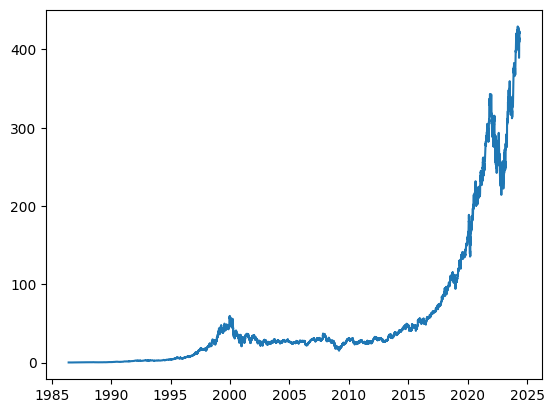

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df



# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df['Target-2'] = principal_df['PC 1']
windowed_df['Target-3'] = principal_df['PC 2']
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,-0.621249,-1.046199,235.460007,232.339996
1,2021-03-26,-0.355023,-1.102961,232.339996,236.479996
2,2021-03-29,-0.414394,-1.090456,236.479996,235.240005
3,2021-03-30,-0.546077,-1.062578,235.240005,231.850006
4,2021-03-31,-0.243631,-1.127097,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,0.329389,-1.243360,294.390015,295.220001
248,2022-03-18,0.290020,-1.234820,295.220001,300.429993
249,2022-03-21,0.155283,-1.205871,300.429993,299.160004
250,2022-03-22,0.290646,-1.234299,299.160004,304.059998


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

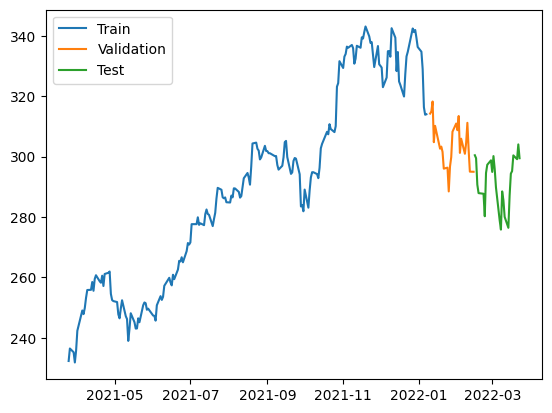

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.005),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 102ms/step - loss: 84262.2188 - mean_absolute_error: 288.5352 - val_loss: 91302.3203 - val_mean_absolute_error: 302.0751
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 82810.1562 - mean_absolute_error: 286.0108 - val_loss: 88944.5000 - val_mean_absolute_error: 298.1469
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 79792.6641 - mean_absolute_error: 280.7272 - val_loss: 84205.9609 - val_mean_absolute_error: 290.0914
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 74078.4141 - mean_absolute_error: 270.3286 - val_loss: 75366.1953 - val_mean_absolute_error: 274.4323
Epoch 5/100
7/7 [==============================] - 0s 13ms/step - loss: 63809.3516 - mean_absolute_error: 250.6849 - val_loss: 60676.2188 - val_mean_absolute_error: 246.2162
Epoch 6/100
7/7 [==============================] - 0s 13ms/step - loss: 48102.7812 - mean_absolute_error: 216.9424 - val_loss: 402

7/7 [==============================] - 0s 3ms/step


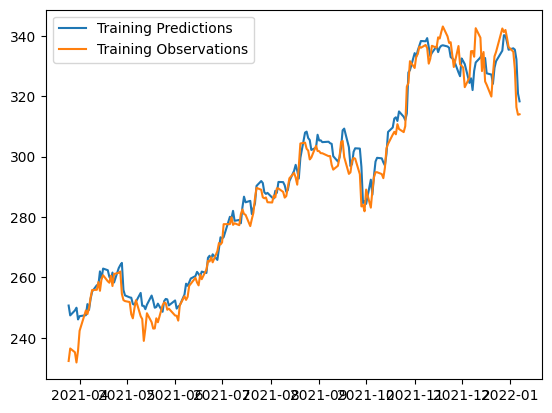

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 24ms/step


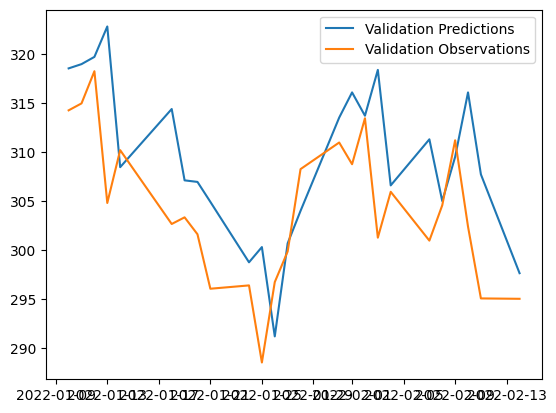

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 23ms/step


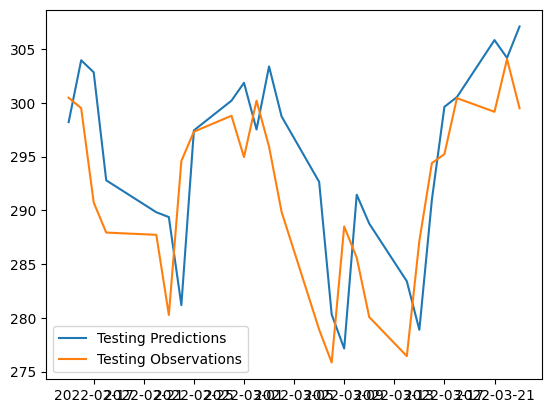

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

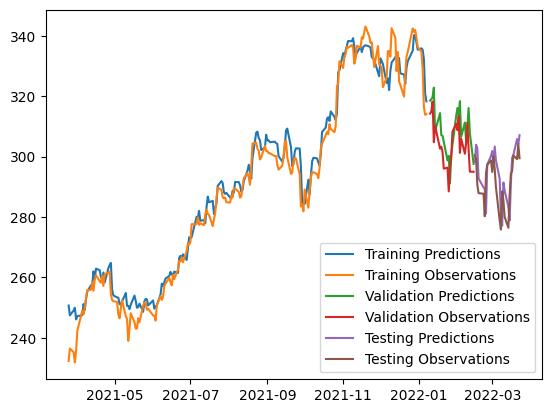

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 23ms/step


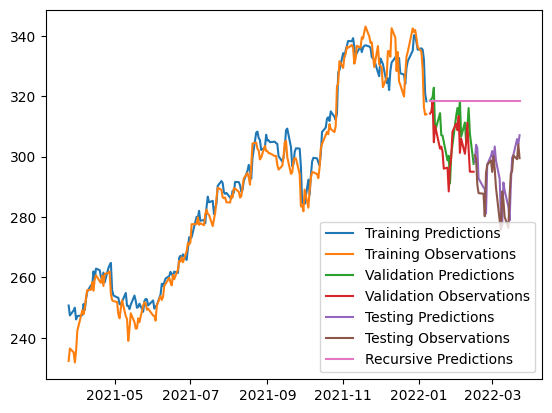

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])